### Births Dataset 

Data is sourced from Jake Vanderplas book. Actually followed his working almost verbatim.  

In [1]:
import pandas as pd
birth = pd.read_csv('c:\\miniconda3\\notebooks\\Python Data Science Handbook\\data\\births.csv')
birth.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [2]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15547 non-null object
gender    15547 non-null object
births    15547 non-null int64
dtypes: int64(3), object(2)
memory usage: 485.9+ KB


In [3]:
birth['day'].unique()
#Note that we also have data for day '99' (whatever that means) and 'null' days (means no day-wise details)

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '99', 'null'], dtype=object)

In [4]:
birth.loc[birth['day']=='99'][:2]

,year,month,day,gender,births
62,1969,1,99,F,26
63,1969,1,99,M,38


In [5]:
birth.loc[birth['day']=='99']['births'].sum()/birth['births'].sum()

# The proportion of '99' day data is very small as compared to total data so we can ignore that.

4.2187621417891761e-05

In [6]:
birth = birth.loc[birth['day']!='99']
birth['day'].unique()
#reomove the data with day = 99

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', 'null'], dtype=object)

In [7]:
birth.loc[birth['day']== 'null']['year'].unique()

#these are the years for which we don't have day-wise data.

array([1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [8]:
birth.pivot_table('births', index = 'year', columns= 'gender', aggfunc = 'sum')[:5]

gender,F,M
year,,
1969,1753074,1845962
1970,1817722,1917192
1971,1736572,1826554
1972,1592179,1673716
1973,1532868,1612835


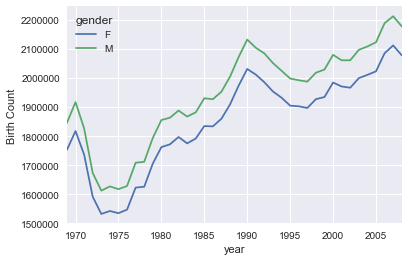

In [9]:
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
birth.pivot_table('births', index = 'year', columns= 'gender', aggfunc = 'sum').plot() #Pandas' built in plotting feature
plt.ylabel('Birth Count');

In [10]:
# remove data containing day = null
birth = birth.loc[birth['day']!= 'null']
birth['day'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [11]:
birth['day'] = birth['day'].astype(int)

So we see that we have instances where June month has 31 days. The same is true for all months which don't have 31 days. Also, we need to be careful about leap years as during those years, Feb month has 29 days. We need to clean our data accordingly.


In [12]:
#first clean the data for the case where 30-days-months have 31 days
month = [2,4,6,9,11]
for i in month:
    b = birth.loc[(birth['month'] == i) & (birth['day'] == 31)]
    birth_new = pd.merge(birth, b, how = 'left', indicator = True)
    birth = birth_new[birth_new['_merge'] == 'left_only']
    birth = birth.drop('_merge', axis = 1)  
    
#quick inspection shows that some Feb months have 29 days with suspecting amount of data. Let's remove them.
d = birth.loc[birth['births'] < 100]
birth_new = pd.merge(birth, d, how = 'left', indicator = True)
birth = birth_new[birth_new['_merge'] == 'left_only']
birth = birth.drop('_merge', axis = 1) 
birth[birth['births'] < 200]    

,year,month,day,gender,births


In [13]:
birth.reset_index().drop('index', axis =1)[:4]

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548


In [15]:
# create a datetime index from the year, month, day
# Earlier this raised error because data wasn't cleaned properly. 
birth.index = pd.to_datetime(10000 * birth.year +
                              100 * birth.month +
                              birth.day, format='%Y%m%d')

birth['dayofweek'] = birth.index.dayofweek
birth[10:15]

,year,month,day,gender,births,dayofweek
1969-01-06,1969,1,6,F,4710,0
1969-01-06,1969,1,6,M,4850,0
1969-01-07,1969,1,7,F,4646,1
1969-01-07,1969,1,7,M,5092,1
1969-01-08,1969,1,8,F,4800,2


In [15]:
birth['decade'] = (birth['year']//10)*10
birth[:2]

,year,month,day,gender,births,dayofweek,decade
1969-01-01,1969,1,1,F,4046,2,1960
1969-01-01,1969,1,1,M,4440,2,1960


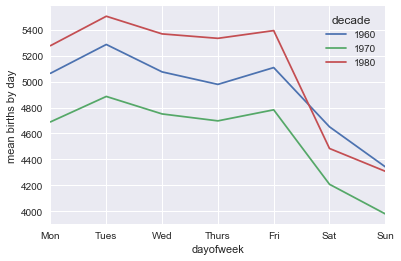

In [16]:
birth.pivot_table('births', index = 'dayofweek', columns = 'decade').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

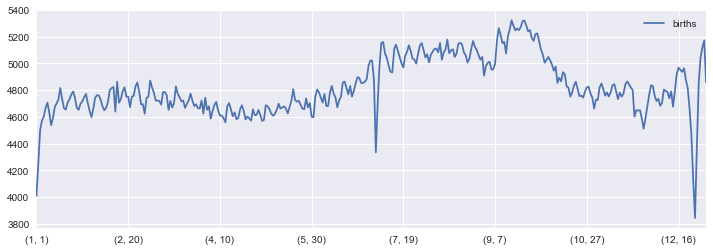

In [17]:
births_by_date = birth.pivot_table('births', [birth.index.month, birth.index.day])
births_by_date.plot(figsize =(12,4))

Above plot is showing mean birth count for each day of the year. There are noticable drops in mean value around New Year, 4 July and Christmas.


### Bicycle Weather

In [16]:
import pandas as pd
bc = pd.read_csv('c:\\miniconda3\\notebooks\\Python Data Science Handbook\\data\\BicycleWeather.csv')
bc.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120101,0,0,0,128,50,47,100,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120102,109,0,0,106,28,45,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120103,8,0,0,117,72,23,180,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120104,203,0,0,122,56,47,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120105,13,0,0,89,28,61,200,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [17]:
import numpy as np
bc['DATE'] = bc['DATE'].astype(object)

In [18]:
bc['DATE'].dtype

dtype('O')

In [20]:
bc.index = pd.to_datetime(bc['DATE'], format = '%Y%m%d')

In [21]:
bc[:3]

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120101,0,0,0,128,50,47,100,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120102,109,0,0,106,28,45,180,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20120103,8,0,0,117,72,23,180,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [37]:
pd.to_datetime(20121231)

Timestamp('1970-01-01 00:00:00.020121231')

### Tips Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
pd.options.display.max_rows = 10
tips = sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [5]:
tips.time.unique(), tips.smoker.unique()


([Dinner, Lunch]
 Categories (2, object): [Dinner, Lunch], [No, Yes]
 Categories (2, object): [No, Yes])

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB


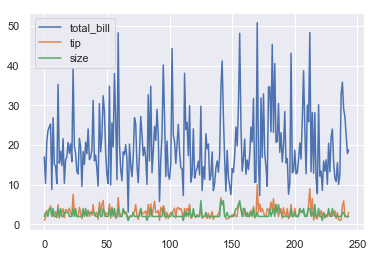

In [7]:
tips.plot()

In [21]:
tips = tips.replace(['Yes','No'], [1, 0])


In [22]:
tips['smoker'].unique()

array([0, 1], dtype=int64)

In [23]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


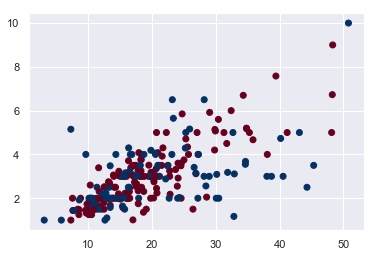

In [43]:
plt.scatter(tips['total_bill'], tips['tip'], c = tips['smoker'], cmap = plt.cm.RdBu)

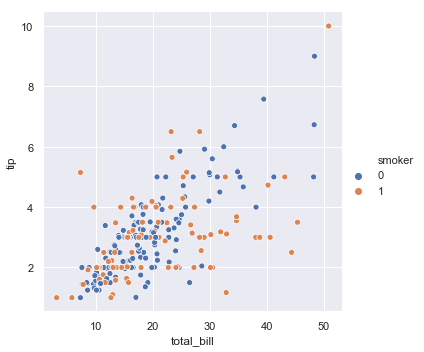

In [44]:
sns.relplot(x = "total_bill", y = "tip",hue = 'smoker', data = tips); #seaborn plot

In [29]:
tips.pivot_table('total_bill', index = 'day', columns = ['smoker', 'sex'])

smoker         No                   Yes           
sex        Female       Male     Female       Male
day                                               
Fri     19.365000  17.475000  12.654286  20.452500
Sat     19.003846  19.929063  20.266667  21.837778
Sun     20.824286  20.403256  16.540000  26.141333
Thur    16.014400  18.486500  19.218571  19.171000

Seems like Male smokers order big. And Sunday is big day for restaurant. Interestingly, female smokers don't order big on Sundays.

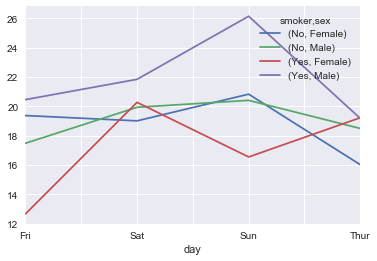

In [31]:
tips.pivot_table('total_bill', index = 'day', columns = ['smoker', 'sex']).plot()

In [32]:
tips.pivot_table('tip', index = 'day', columns = ['smoker', 'sex'])

smoker        No                 Yes          
sex       Female      Male    Female      Male
day                                           
Fri     3.125000  2.500000  2.682857  2.741250
Sat     2.724615  3.256563  2.868667  2.879259
Sun     3.329286  3.115349  3.500000  3.521333
Thur    2.459600  2.941500  2.990000  3.058000

Again, male smokers are generous with tips as well. And they are most generous on Sundays. Interestingly, female smokers are almost as generous as their male counterparts. The same is not true for non-smoker category

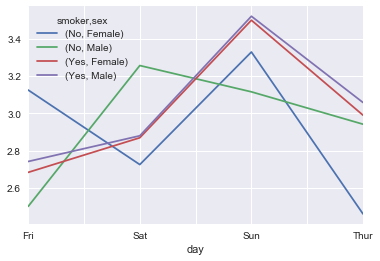

In [33]:
tips.pivot_table('tip', index = 'day', columns = ['smoker', 'sex']).plot()

In [41]:
tips.groupby(['day','sex']).mean().unstack()

total_bill                  tip                size          
sex      Female       Male    Female      Male    Female      Male
day                                                               
Fri   14.145556  19.857000  2.781111  2.693000  2.111111  2.100000
Sat   19.680357  20.802542  2.801786  3.083898  2.250000  2.644068
Sun   19.872222  21.887241  3.367222  3.220345  2.944444  2.810345
Thur  16.715312  18.714667  2.575625  2.980333  2.468750  2.433333

In [44]:
tips.groupby(['day'])['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

#### Removing the day-group for which mean order bill was not greater than 20

In [45]:
a = tips.groupby('day').filter(lambda x : x['total_bill'].mean() > 20)
a

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [47]:
a.day.unique()

array(['Sun', 'Sat'], dtype=object)

Below is the toy example to see what is going on in above example.

In [48]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)})
df

,data1,data2,key
0,0,5,A
1,1,0,B
2,2,3,C
3,3,3,A
4,4,7,B
5,5,9,C


In [50]:
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [51]:
df.groupby('key').filter(filter_func) #keep the rows for which filter_func returns True

,data1,data2,key
1,1,0,B
2,2,3,C
4,4,7,B
5,5,9,C


In [53]:
tips.groupby('sex').aggregate({'total_bill':'max', 'tip':'max'})

,total_bill,tip
sex,,
Female,44.30,6.5
Male,50.81,10.0


In [59]:
tips.groupby('sex').aggregate('max')

#aggregate is performed alphabetically on text data

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,44.30,6.5,Yes,Thur,Lunch,6
Male,50.81,10.0,Yes,Thur,Lunch,6


### fMRI dataset

In [49]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [50]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
subject      1064 non-null object
timepoint    1064 non-null int64
event        1064 non-null object
region       1064 non-null object
signal       1064 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 29.1+ KB


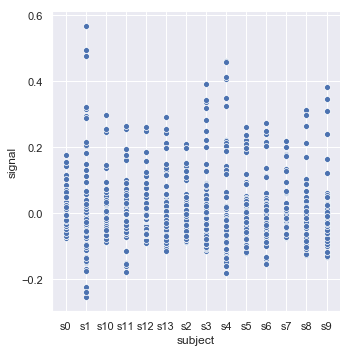

In [51]:
sns.relplot(x = 'subject', y = 'signal', data = fmri)

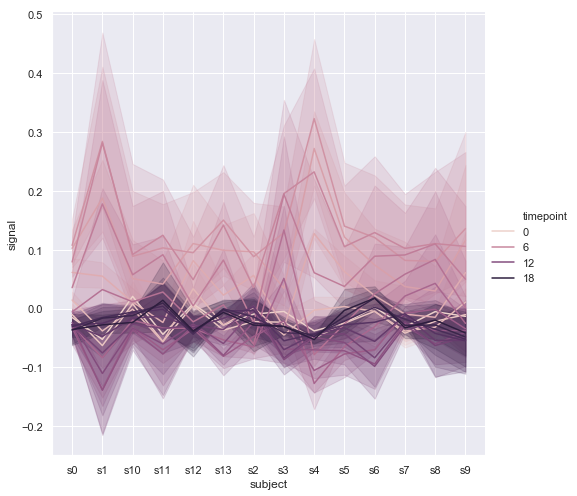

In [58]:
sns.relplot(x = 'subject', y = 'signal', hue = 'timepoint',data = fmri, kind = 'line', height = 7)

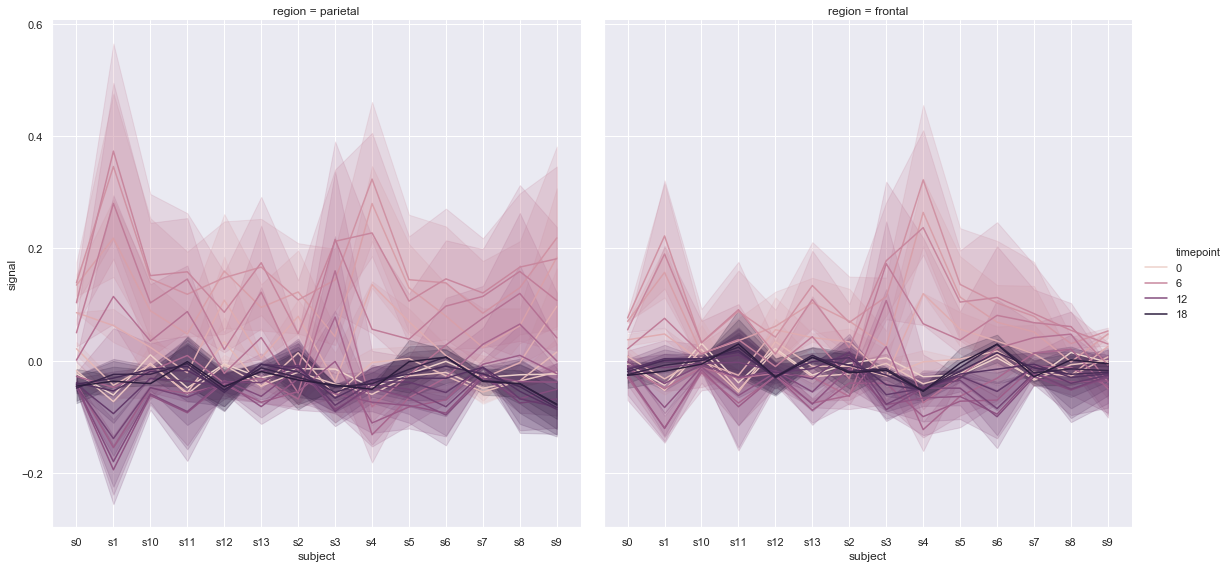

In [59]:
sns.relplot(x = 'subject', y = 'signal', hue = 'timepoint',data = fmri, kind = 'line', col = 'region', height = 8)

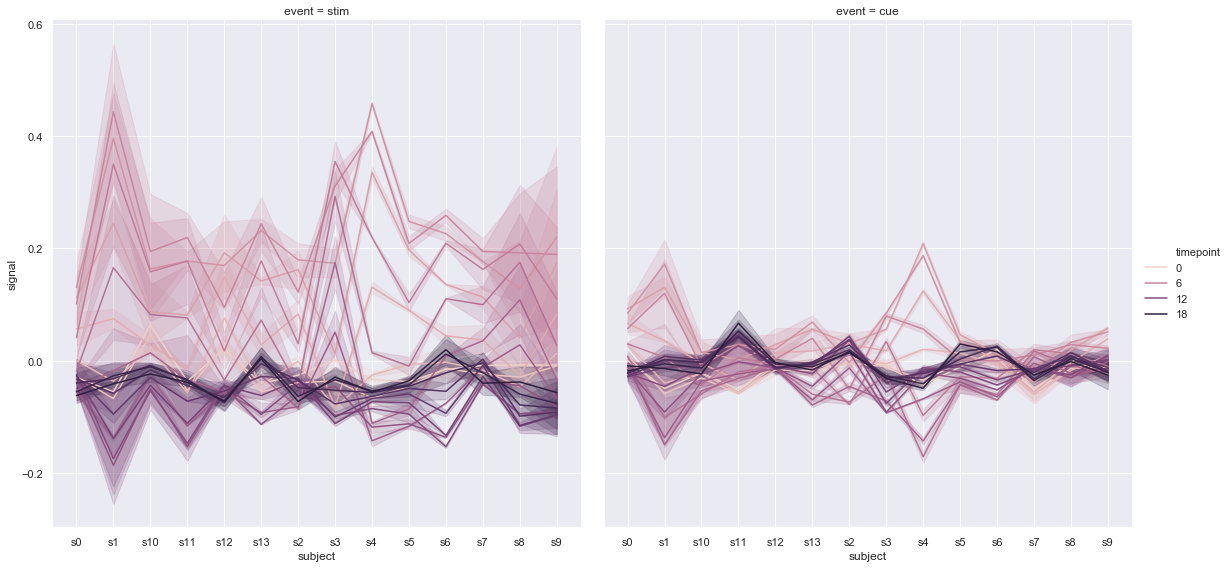

In [60]:
sns.relplot(x = 'subject', y = 'signal', hue = 'timepoint',data = fmri, kind = 'line', col = 'event', height = 8)

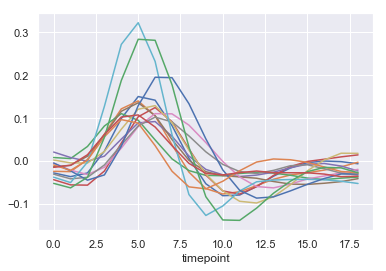

In [83]:
#mean signal value for each subject at different timepoint
a = fmri.subject.unique()
for i in a:
    fmri[fmri['subject'] == i].groupby('timepoint')['signal'].mean().plot()

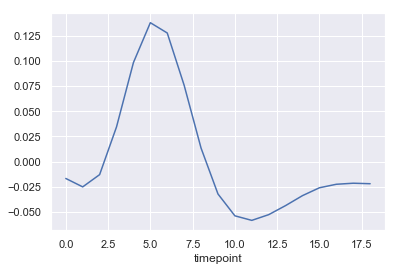

In [86]:
#mean signal value for all subjects at different timepoints
fmri.groupby('timepoint')['signal'].mean().plot();

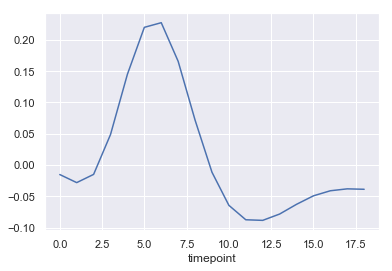

In [87]:
fmri[fmri['event'] == 'stim'].groupby('timepoint')['signal'].mean().plot();

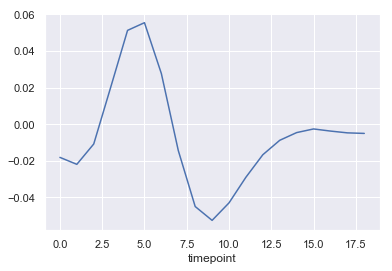

In [88]:
fmri[fmri['event'] == 'cue'].groupby('timepoint')['signal'].mean().plot();

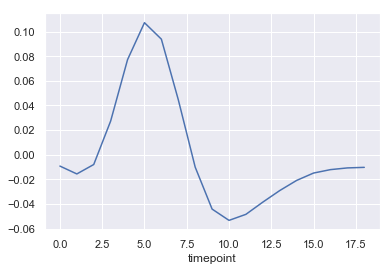

In [89]:
fmri[fmri['region'] == 'frontal'].groupby('timepoint')['signal'].mean().plot();

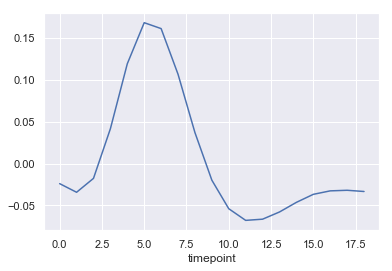

In [90]:
fmri[fmri['region'] == 'parietal'].groupby('timepoint')['signal'].mean().plot();

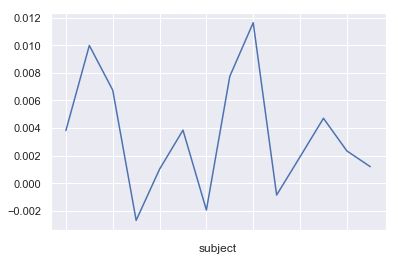

In [91]:
fmri.groupby('subject')['signal'].mean().plot(); #for all subjects combined

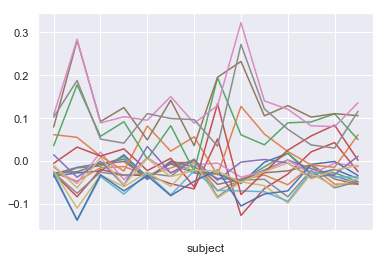

In [92]:
a = fmri.timepoint.unique()
for i in a:
    fmri[fmri['timepoint'] == i].groupby('subject')['signal'].mean().plot()